In [26]:
import joblib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("sales.csv")

In [4]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15226 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          15189 non-null  object
 1   Product           15189 non-null  object
 2   Quantity Ordered  15189 non-null  object
 3   Price Each        15189 non-null  object
 4   Order Date        15189 non-null  object
 5   Purchase Address  15189 non-null  object
dtypes: object(6)
memory usage: 713.8+ KB


In [6]:
df.isnull().sum()

Order ID            37
Product             37
Quantity Ordered    37
Price Each          37
Order Date          37
Purchase Address    37
dtype: int64

In [7]:
# Convert 'Quantity Ordered' & 'Price Each' to numeric (before filling NaNs)
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], errors="coerce")
df["Price Each"] = pd.to_numeric(df["Price Each"], errors="coerce")

# Fill missing values with the mean (Now it's numeric, so no TypeError!)
df["Quantity Ordered"].fillna(df["Quantity Ordered"].mean(), inplace=True)
df["Price Each"].fillna(df["Price Each"].mean(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_9628\3241771490.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Quantity Ordered"].fillna(df["Quantity Ordered"].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9628\3241771490.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [8]:
df.isnull().sum()

Order ID            37
Product             37
Quantity Ordered     0
Price Each           0
Order Date          37
Purchase Address    37
dtype: int64

In [9]:
# Convert 'Order Date' to datetime, handling errors and filling missing values
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

# Fill missing 'Order Date' values with the most frequent date (mode)
df["Order Date"].fillna(df["Order Date"].mode()[0], inplace=True)

# Now extract new features
df["Month"] = df["Order Date"].dt.month
df["Hour"] = df["Order Date"].dt.hour
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]


C:\Users\user\AppData\Local\Temp\ipykernel_9628\3773909831.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
C:\Users\user\AppData\Local\Temp\ipykernel_9628\3773909831.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Order Date"].fillna(df["Order Date"].mode()[0], inplace=True)


In [10]:
# Convert to numeric
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], errors="coerce")
df["Price Each"] = pd.to_numeric(df["Price Each"], errors="coerce")

# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)


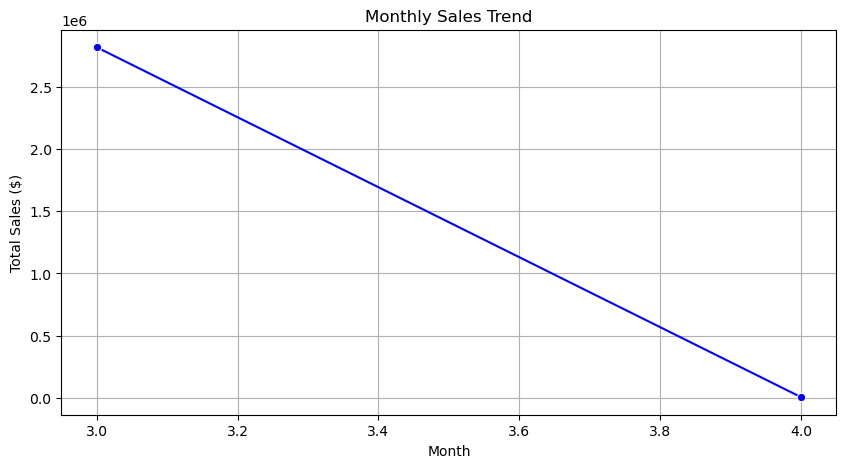

In [11]:
monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="b")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9628\788379454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette="viridis")


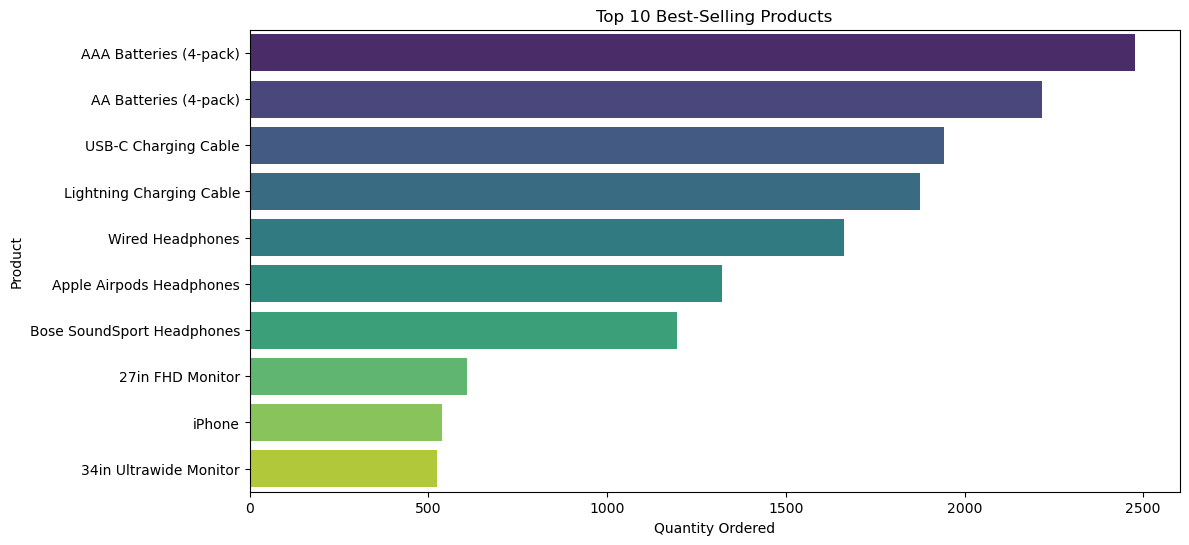

In [12]:
product_sales = df.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Ordered")
plt.ylabel("Product")
plt.show()

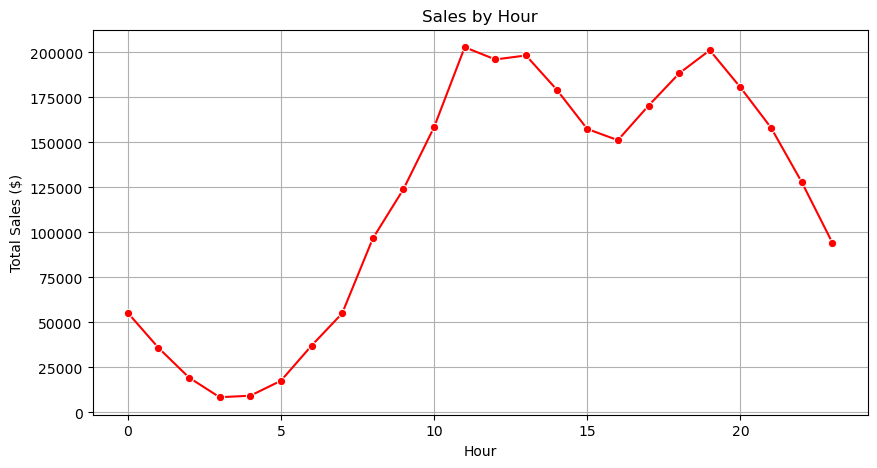

In [13]:
hourly_sales = df.groupby("Hour")["Sales"].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o", color="r")
plt.title("Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Total Sales ($)")
plt.grid()
plt.show()


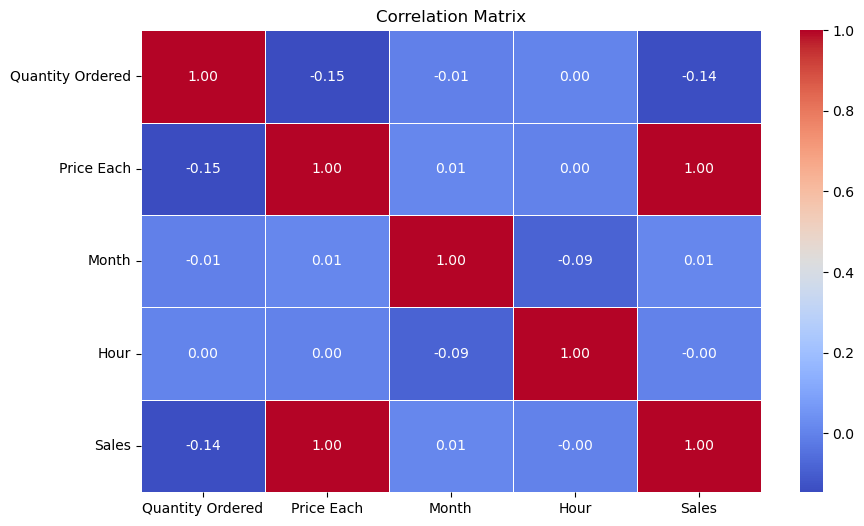

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [15]:
print(df.columns)  # Check all column names


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Hour', 'Sales'],
      dtype='object')


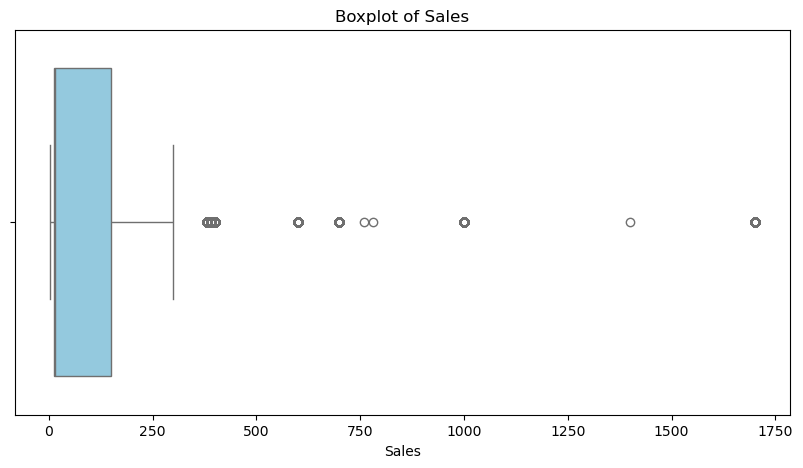

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Sales"], color="skyblue")
plt.title("Boxplot of Sales")
plt.show()


In [17]:
# Function to extract city from "Purchase Address"
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
def extract_city(address):
    try:
        if pd.isna(address) or not isinstance(address, str):
            return np.nan  # Handle missing or invalid data
        parts = address.split(",")
        if len(parts) > 1:
            return parts[-2].strip()  # Extract city correctly
        return np.nan
    except Exception as e:
        print(f"Error processing address: {address} -> {e}")
        return np.nan  

# Apply function to extract City
df["City"] = df["Purchase Address"].apply(extract_city)

# Drop rows with missing values in "City" or "Sales"
df.dropna(subset=["City", "Sales"], inplace=True)

# Apply Label Encoding to "City"
df["City"] = LabelEncoder().fit_transform(df["City"])

# Feature selection
X = df[["Month", "Hour", "City", "Quantity Ordered", "Price Each"]]
y = df["Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.24
R² Score: 1.00


In [18]:
from sklearn.metrics import r2_score

# Compute R² Score
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print(f"Train R² Score: {train_r2:.2f}")
print(f"Test R² Score: {test_r2:.2f}")


Train R² Score: 1.00
Test R² Score: 1.00


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
df["City"] = LabelEncoder().fit_transform(df["City"])

# Select features and target variable
X = df[["Month", "Hour", "City", "Quantity Ordered", "Price Each"]]
y = df["Sales"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[["Month", "Hour", "City", "Quantity Ordered", "Price Each"]])
joblib.dump(scaler, "scaler.pkl")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, y_pred))  # Should be less than 1


R² Score: 0.9992183014096917


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print("Random Forest R²:", r2_score(y_test, rf_pred))


Random Forest R²: 0.9991156262585117


In [28]:
joblib.dump(model, "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully!")

✅ Model and scaler saved successfully!


In [32]:
import joblib

scaler = joblib.load("scaler.pkl")
print(f"Scaler expects {scaler.n_features_in_} features")


Scaler expects 5 features
